<a href="https://colab.research.google.com/github/anirxudh/Deep-Learning-Lab-Tutorial-KTU/blob/main/Exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPERIMENT NO 5
## Anirudh S Nair
### CNN using MNIST

# Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Dataset loading and Preparation

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

# Model Building

In [ ]:
model=models.Sequential([

    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2,)),
    layers.Conv2D(32, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2855 - loss: 1.9402 - val_accuracy: 0.8219 - val_loss: 0.5860
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8338 - loss: 0.5571 - val_accuracy: 0.8712 - val_loss: 0.4177
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 0.4246 - val_accuracy: 0.8947 - val_loss: 0.3439
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8922 - loss: 0.3572 - val_accuracy: 0.8992 - val_loss: 0.3176
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9057 - loss: 0.3119 - val_accuracy: 0.9204 - val_loss: 0.2643
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9149 - loss: 0.2842 - val_accuracy: 0.9236 - val_loss: 0.2413
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9220 - loss: 0.2591 - val_accuracy: 0.9269 - val_loss: 0.2339
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9297 - loss: 0.2373 

# Model Prediction and Plotting

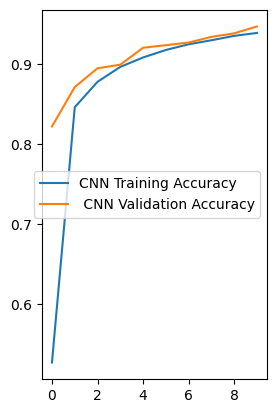

In [33]:
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], label='CNN Training Accuracy')
plt.plot(r.history['val_accuracy'], label=' CNN Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
predict=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 1.0, 'true label: 3 \n predicted label: 3')

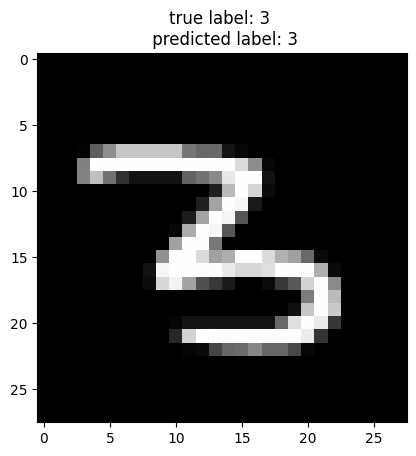

In [ ]:
import random
p_test=model.predict(x_test).argmax(axis=1)
misclassified_idx=np.where(p_test == y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("true label: %s \n predicted label: %s" % (y_test[i], p_test[i]))